In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os

os.chdir("C:\\Users\\olya\\Downloads")
import xml.etree.ElementTree as ET

In [136]:

df = open('electric power.xml', 'r').read()
root = ET.XML(df)

data = []
cols = []
for i, child in enumerate(root):
    data.append([subchild.text for subchild in child])
    cols.append(child.tag)

df = pd.DataFrame(data).T  # Write in DF and transpose it
df.columns = cols  # Update column names
df=df.transpose()
df

,0,1,2
DATA_RECORD,243887,01.01.2009 0:00:00.000000,1
DATA_RECORD,243068,01.01.2009 0:00:00.000000,2
DATA_RECORD,242266,01.01.2009 0:00:00.000000,3
DATA_RECORD,242659,01.01.2009 0:00:00.000000,4
DATA_RECORD,243724,01.01.2009 0:00:00.000000,5
...,...,...,...
DATA_RECORD,371835,31.12.2010 0:00:00.000000,20
DATA_RECORD,370674,31.12.2010 0:00:00.000000,21
DATA_RECORD,369646,31.12.2010 0:00:00.000000,22
DATA_RECORD,365917,31.12.2010 0:00:00.000000,23


In [137]:
df = df.rename(columns={0: 'quant'})
df = df.rename(columns={1: 'date'})
df = df.rename(columns={2: 'hour'})
df

,quant,date,hour
DATA_RECORD,243887,01.01.2009 0:00:00.000000,1
DATA_RECORD,243068,01.01.2009 0:00:00.000000,2
DATA_RECORD,242266,01.01.2009 0:00:00.000000,3
DATA_RECORD,242659,01.01.2009 0:00:00.000000,4
DATA_RECORD,243724,01.01.2009 0:00:00.000000,5
...,...,...,...
DATA_RECORD,371835,31.12.2010 0:00:00.000000,20
DATA_RECORD,370674,31.12.2010 0:00:00.000000,21
DATA_RECORD,369646,31.12.2010 0:00:00.000000,22
DATA_RECORD,365917,31.12.2010 0:00:00.000000,23


In [138]:
df.index=(range(len(df)))
df

,quant,date,hour
0,243887,01.01.2009 0:00:00.000000,1
1,243068,01.01.2009 0:00:00.000000,2
2,242266,01.01.2009 0:00:00.000000,3
3,242659,01.01.2009 0:00:00.000000,4
4,243724,01.01.2009 0:00:00.000000,5
...,...,...,...
17513,371835,31.12.2010 0:00:00.000000,20
17514,370674,31.12.2010 0:00:00.000000,21
17515,369646,31.12.2010 0:00:00.000000,22
17516,365917,31.12.2010 0:00:00.000000,23


In [139]:
df['quant']=df['quant'].astype(str).astype(float)
#df['date']=pd.to_datetime(df['date'])
df['hour']=df['hour'].astype(str).astype(int)

In [140]:
df.dtypes

quant    float64
date      object
hour       int32
dtype: object

In [141]:
df

,quant,date,hour
0,243887.0,01.01.2009 0:00:00.000000,1
1,243068.0,01.01.2009 0:00:00.000000,2
2,242266.0,01.01.2009 0:00:00.000000,3
3,242659.0,01.01.2009 0:00:00.000000,4
4,243724.0,01.01.2009 0:00:00.000000,5
...,...,...,...
17513,371835.0,31.12.2010 0:00:00.000000,20
17514,370674.0,31.12.2010 0:00:00.000000,21
17515,369646.0,31.12.2010 0:00:00.000000,22
17516,365917.0,31.12.2010 0:00:00.000000,23


In [142]:
df[df['hour']==3].count

<bound method DataFrame.count of           quant                       date  hour
2      242266.0  01.01.2009 0:00:00.000000     3
26     242270.0  02.01.2009 0:00:00.000000     3
50     245231.0  03.01.2009 0:00:00.000000     3
74     248550.0  04.01.2009 0:00:00.000000     3
98     252412.0  05.01.2009 0:00:00.000000     3
...         ...                        ...   ...
17400  260913.0  27.12.2010 0:00:00.000000     3
17424  263762.0  28.12.2010 0:00:00.000000     3
17448  329908.0  29.12.2010 0:00:00.000000     3
17472  337204.0  30.12.2010 0:00:00.000000     3
17496  336900.0  31.12.2010 0:00:00.000000     3

[728 rows x 3 columns]>

In [337]:
sutki = pd.DataFrame({'date': ['0'], 'record': [0]})
sutki

,date,record
0,0,0


In [338]:
i = 0
while i < 17518:
    aaa=df.loc[i].at['quant']
    flag=1
    for t in range(1,24):
        if (df.loc[i+t].at['hour']==3):
            flag=flag*0
    if (flag==0):
        for t in range(1,24):
            aaa+=df.loc[i+t].at['quant']
        i=i+24
    else:
        for t in range(1,23):
            aaa+=df.loc[i+t].at['quant']
        i=i+23
    new_row = {'record':aaa, 'date':df.loc[i-1].at['date']}
    sutki = sutki.append(new_row, ignore_index=True)
sutki

,date,record
0,0,0.0
1,01.01.2009 0:00:00.000000,5830312.0
2,02.01.2009 0:00:00.000000,5865441.0
3,03.01.2009 0:00:00.000000,5949114.0
4,04.01.2009 0:00:00.000000,6067779.0
...,...,...
726,27.12.2010 0:00:00.000000,6624696.0
727,28.12.2010 0:00:00.000000,7543819.0
728,29.12.2010 0:00:00.000000,8790105.0
729,30.12.2010 0:00:00.000000,8876376.0


In [339]:
sutki['date']=sutki['date'].astype(str)

In [340]:
sutki

,date,record
0,0,0.0
1,01.01.2009 0:00:00.000000,5830312.0
2,02.01.2009 0:00:00.000000,5865441.0
3,03.01.2009 0:00:00.000000,5949114.0
4,04.01.2009 0:00:00.000000,6067779.0
...,...,...
726,27.12.2010 0:00:00.000000,6624696.0
727,28.12.2010 0:00:00.000000,7543819.0
728,29.12.2010 0:00:00.000000,8790105.0
729,30.12.2010 0:00:00.000000,8876376.0


In [341]:
for i in range(1,731):
    aaa = sutki.loc[i].at['date'].split(' ')[0]
    sutki.loc[i,'date']=aaa
sutki

,date,record
0,0,0.0
1,01.01.2009,5830312.0
2,02.01.2009,5865441.0
3,03.01.2009,5949114.0
4,04.01.2009,6067779.0
...,...,...
726,27.12.2010,6624696.0
727,28.12.2010,7543819.0
728,29.12.2010,8790105.0
729,30.12.2010,8876376.0


In [342]:
sutki=sutki.drop(labels = [0],axis = 0)
sutki

,date,record
1,01.01.2009,5830312.0
2,02.01.2009,5865441.0
3,03.01.2009,5949114.0
4,04.01.2009,6067779.0
5,05.01.2009,6115772.0
...,...,...
726,27.12.2010,6624696.0
727,28.12.2010,7543819.0
728,29.12.2010,8790105.0
729,30.12.2010,8876376.0


In [343]:
sutki['date'] = pd.to_datetime(sutki['date'], format='%d.%m.%Y')
sutki

,date,record
1,2009-01-01,5830312.0
2,2009-01-02,5865441.0
3,2009-01-03,5949114.0
4,2009-01-04,6067779.0
5,2009-01-05,6115772.0
...,...,...
726,2010-12-27,6624696.0
727,2010-12-28,7543819.0
728,2010-12-29,8790105.0
729,2010-12-30,8876376.0


Text(0, 0.5, 'log10 electricity')

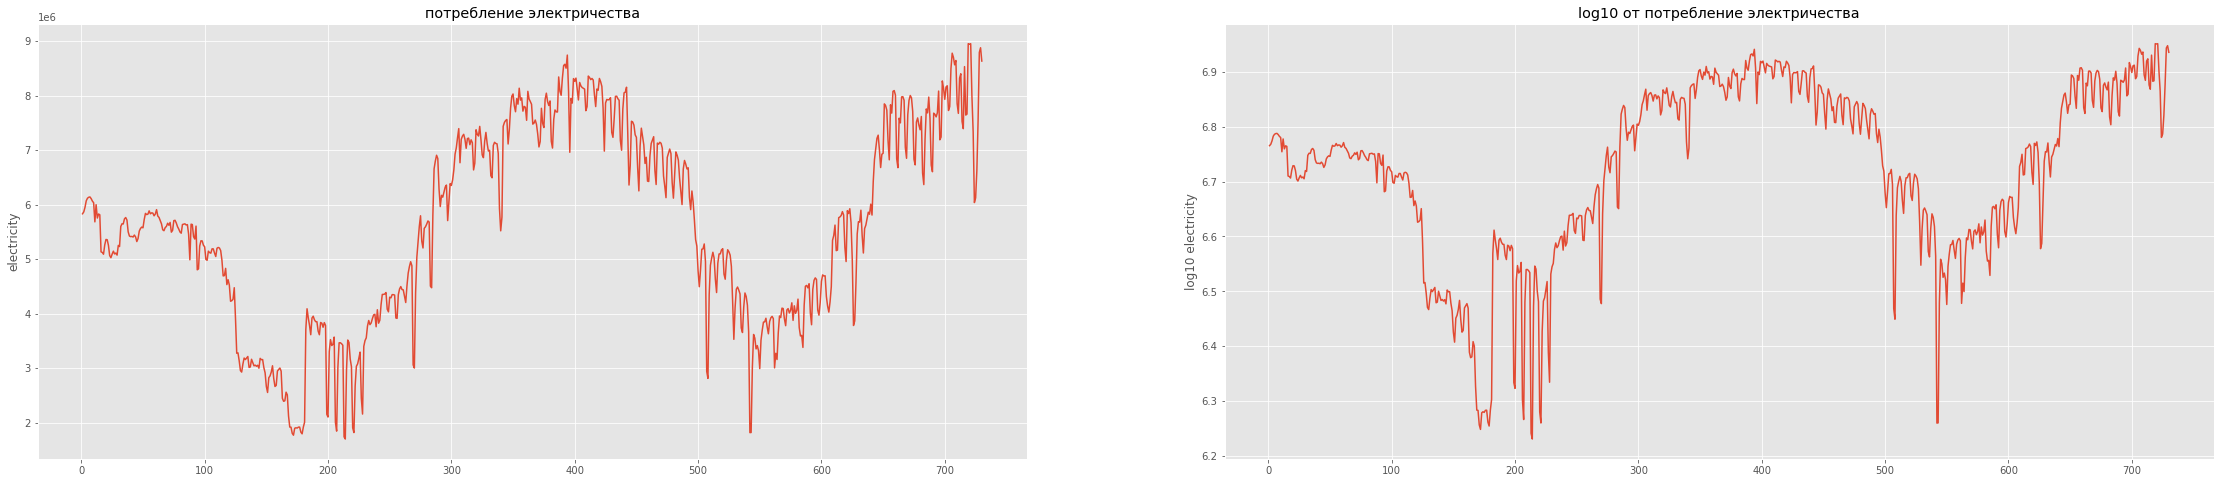

In [344]:
fig = plt.figure(figsize=(39, 8))
ax1 = fig.add_subplot(121)
sutki['record'].plot(ax=ax1)
ax1.set_title(u'потребление электричества')
ax1.set_ylabel(u'electricity')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(sutki['record'])).plot(ax=ax2)
ax2.set_title(u'log10 от потребление электричества')
ax2.set_ylabel(u'log10 electricity')

In [345]:

new_dates = pd.date_range('2011-01-01', '2011-01-07', freq='D')
df2 = pd.DataFrame({'date': new_dates,'record':0})
df2

,date,record
0,2011-01-01,0
1,2011-01-02,0
2,2011-01-03,0
3,2011-01-04,0
4,2011-01-05,0
5,2011-01-06,0
6,2011-01-07,0


In [346]:
sutki=pd.concat([sutki, df2])
sutki.index=(range(len(sutki)))
sutki

,date,record
0,2009-01-01,5830312.0
1,2009-01-02,5865441.0
2,2009-01-03,5949114.0
3,2009-01-04,6067779.0
4,2009-01-05,6115772.0
...,...,...
732,2011-01-03,0.0
733,2011-01-04,0.0
734,2011-01-05,0.0
735,2011-01-06,0.0


In [347]:
df2=sutki
df2

,date,record
0,2009-01-01,5830312.0
1,2009-01-02,5865441.0
2,2009-01-03,5949114.0
3,2009-01-04,6067779.0
4,2009-01-05,6115772.0
...,...,...
732,2011-01-03,0.0
733,2011-01-04,0.0
734,2011-01-05,0.0
735,2011-01-06,0.0


In [384]:
from sklearn.linear_model import LinearRegression

In [349]:
df2['days'] = range(1, len(df2) + 1)
df2

,date,record,days
0,2009-01-01,5830312.0,1
1,2009-01-02,5865441.0,2
2,2009-01-03,5949114.0,3
3,2009-01-04,6067779.0,4
4,2009-01-05,6115772.0,5
...,...,...,...
732,2011-01-03,0.0,733
733,2011-01-04,0.0,734
734,2011-01-05,0.0,735
735,2011-01-06,0.0,736


In [350]:
for x in range(1, 13):
    df2['season_' + str(x)] = df2['date'].dt.month == x

In [351]:
season_columns = ['season_' + str(x) for x in range(2, 13)]
season_columns

['season_2',
 'season_3',
 'season_4',
 'season_5',
 'season_6',
 'season_7',
 'season_8',
 'season_9',
 'season_10',
 'season_11',
 'season_12']

In [352]:
X = df2[['days'] + season_columns]
y = df2['record']

In [353]:
X1 = X[X.index < 730]
y1 = y[y.index < 730]

In [354]:
model = LinearRegression()
model.fit(X1, y1)

LinearRegression()

<AxesSubplot:>

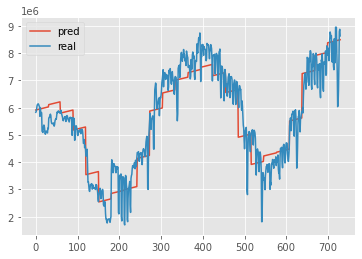

In [355]:
pred = pd.DataFrame({
    'pred': model.predict(X1),
    'real': y1})
pred.plot()

In [359]:
for i in range(730,737):
    y[i]=None

<ipython-input-359-252bca6f803e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=None


In [360]:
y

0      5830312.0
1      5865441.0
2      5949114.0
3      6067779.0
4      6115772.0
         ...    
732          NaN
733          NaN
734          NaN
735          NaN
736          NaN
Name: record, Length: 737, dtype: float64

<AxesSubplot:>

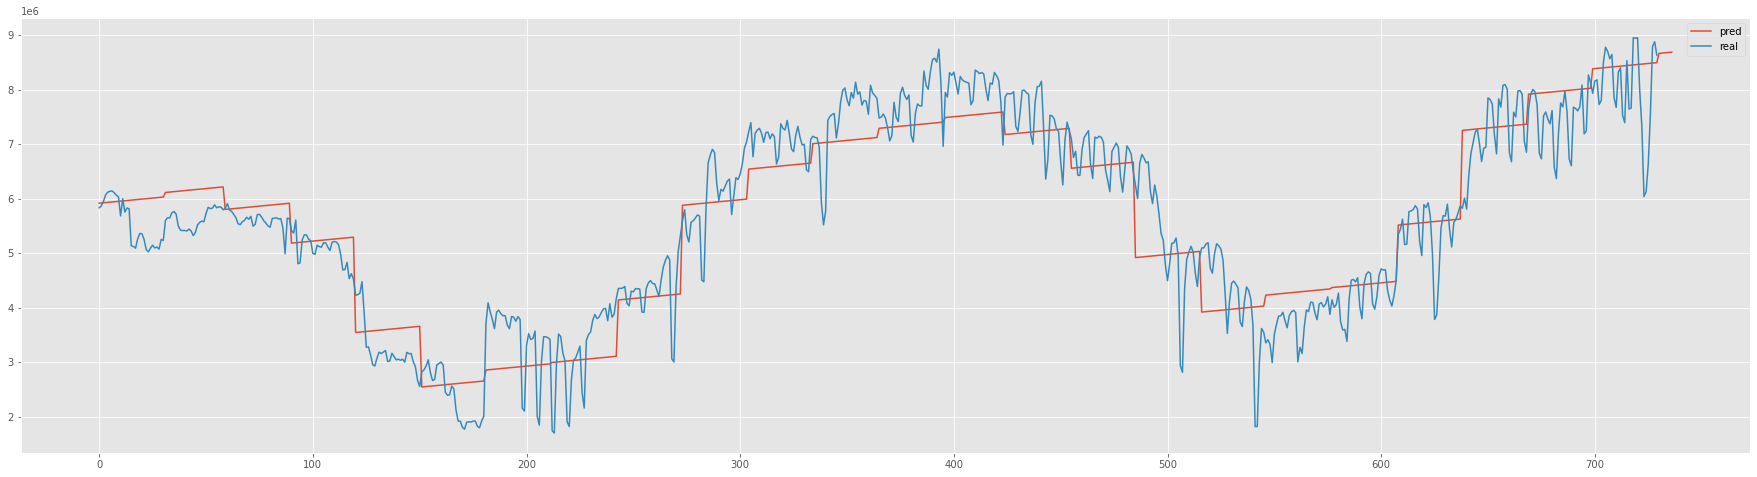

In [371]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
plt.rcParams["figure.figsize"] = (31, 8)
pred.plot()

In [378]:
daysrec=model.predict(X)[-7:]
daysdat=df2['date'][-7:]

In [380]:
seven=pd.DataFrame({
    'date': daysdat,
    'pred': daysrec})
seven

,date,pred
730,2011-01-01,8.662461e+06
731,2011-01-02,8.666225e+06
732,2011-01-03,8.669989e+06
733,2011-01-04,8.673753e+06
734,2011-01-05,8.677517e+06
735,2011-01-06,8.681281e+06
736,2011-01-07,8.685044e+06


In [381]:
r2=(model.score(X1, y1))
r2

0.8679461749714339

In [386]:
from sklearn import metrics

In [390]:
mape=metrics.mean_absolute_percentage_error(y1,model.predict(X1))
mape

0.11136777312888836